## Homework 6


#### Exercise 10 
This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

#### (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [5]:
install.packages("ISLR")
library("ISLR")

install.packages("psych")
library("psych")

head(Weekly)
nrow(Weekly) #look at the dataset

summary(Weekly) #get statistical summary


The downloaded binary packages are in
	/var/folders/3n/g4p4960s3wx9bqgjvhfjz07c0000gn/T//RtmpT5LbJL/downloaded_packages


also installing the dependencies ‘tmvnsim’, ‘mnormt’





The downloaded binary packages are in
	/var/folders/3n/g4p4960s3wx9bqgjvhfjz07c0000gn/T//RtmpT5LbJL/downloaded_packages


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
6,1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


[1] 1089

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

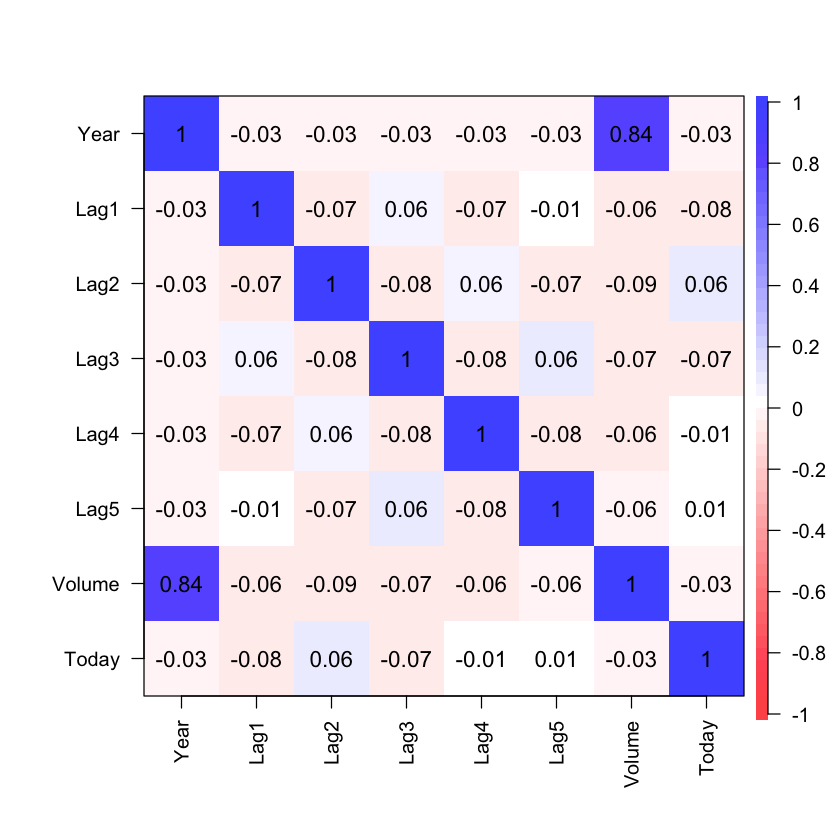

In [7]:
cormatrix_Weekly <- cor(Weekly[, -9]) #get correlation matrix
cor.plot(cormatrix_Weekly, numbers=TRUE, las = 2) #plot the correlations in color to see them better

The matrix and the plot above show that there are only very small correlations between the variables, except for the positive correlation between volume and year. I will plot this to look at it a bit closer.


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



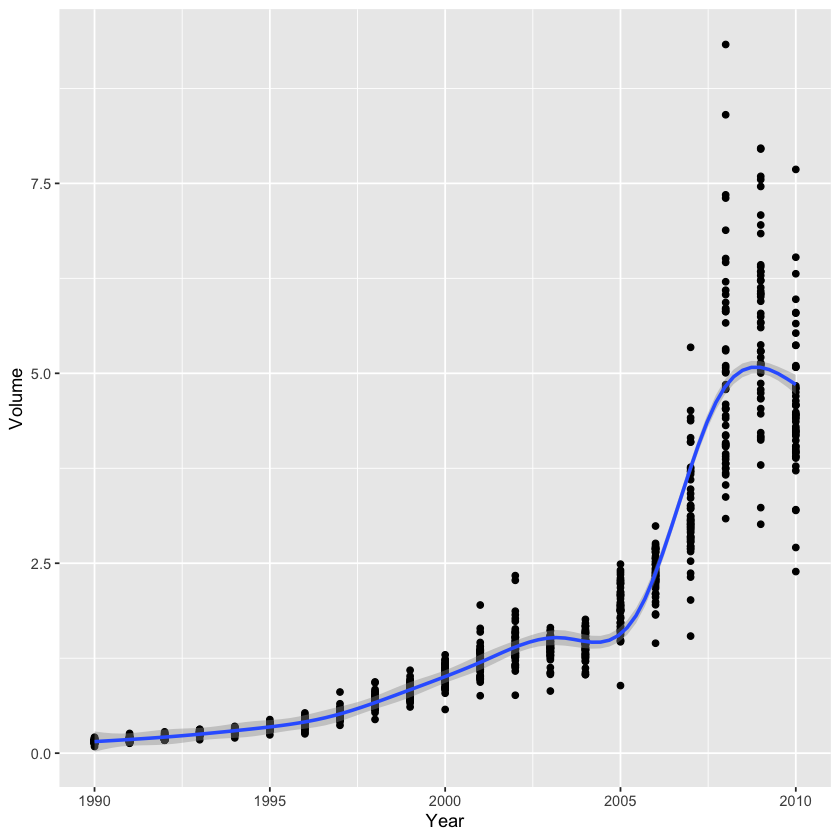

In [8]:
library(ggplot2)
ggplot(Weekly, aes(Year, Volume)) + geom_point() + geom_smooth()

The plot shows that there is a positive (but not perfectly linear) relationship between Volume and Year. This means that the average number of daily shares traded in billions in this dataset tends to get bigger over time. Looking closely, it seems like there has been a slight decrease in this number after 2008, which could (maybe?) fit the financial crisis.

#### (b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [12]:
logr_direction <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Weekly, family = binomial) 
#build logistig regression (glm) to predict direction with all lag variables and volume

summary(logr_direction)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


The output shows us that only Lag2 is statistically significant as a predictor for direction in this regression, which we can find by checking the significance codes (the intercept doesn't count). 

#### (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [13]:
glm.probs = predict(logr_direction,type = "response")
# predict the probability that the market will go up, given values of the predictors. The type="response" option tells R to output probabilities of the form P(Y = 1|X).

contrasts (Weekly$Direction) #check if R has created dummy variable for Down/Up

glm.pred = rep("Down", length(glm.probs)) #create a vector of "down" with the length of glm.probs
glm.pred[glm.probs > 0.5] = "Up" #transform all elements that have a probability over 0.5 to "up"

table(glm.pred, Weekly$Direction) #show the confusion matrix for down and up predictions compared to the actual data


,Up
Down,0
Up,1


        
glm.pred Down  Up
    Down   54  48
    Up    430 557

In [14]:
(54+557) / (54+557+48+430)
557 / (557+48)
54 / (54+430)

[1] 0.5610652

[1] 0.9206612

[1] 0.1115702

The confusion matrix is telling us the shares of correct predictions, which we can compute by summarizing them and dividing them by the full amount of predictions made: (54+557) : (54+557+48+430) = 56.1%. This means that the model makes the right prediction 56.1% of the time. I wouldn't wanna put my savings in this one.

We can also be a bit more exact and differentiate between days on which the market goes up vs days on which it goes down. 
On "up"-days, the correct prediction rate is: 557 : (557+48) = 92.1%
On "down"-days, the correct prediction rate is: 54 : (54+430) = 11.2%


#### (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [15]:
train = (Weekly$Year < 2009) #create a vector for all years up until 2008

Weekly.2008 = Weekly[!train, ] #create submatrix of the stock market data containing only observations in 2008
dim(Weekly.2008) #look at the dimension of this submatrix 
Direction.2008 = Weekly$Direction[!train] #create subset of direction values containing only values for 2008

glm.fits=glm(Direction ~ Lag2, data=Weekly, family=binomial, subset=train) #fit logistic regression model using the train subset
glm.probs=predict(glm.fits, Weekly.2008, type="response") #find probabilities for this model

glm.pred = rep("Down", length(glm.probs)) 
glm.pred[glm.probs > 0.5] = "Up"
table(glm.pred, Direction.2008) #compare the predictions for 2008 with the actual data for 2008

(9 + 56) / (9+56+34+5) #compute the fraction of correct predictions

[1] 104   9

        Direction.2008
glm.pred Down Up
    Down    9  5
    Up     34 56

[1] 0.625

The overall fraction of correct predictions is 62.5%.

#### (e) Repeat (d) using LDA.

In [16]:
install.packages ("MASS")
library(MASS)

lda.fit=lda(Direction ~ Lag2, data=Weekly, subset=train) #fit a linear discriminant model to the training data to predict direction with lag2
lda.fit

lda.pred=predict(lda.fit, Weekly.2008) 
lda.class=lda.pred$Direction
table(lda.pred$class, Direction.2008) #compare the predictions for 2008 with the actual data


The downloaded binary packages are in
	/var/folders/3n/g4p4960s3wx9bqgjvhfjz07c0000gn/T//RtmpT5LbJL/downloaded_packages


Call:
lda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

      Direction.2008
       Down Up
  Down    9  5
  Up     34 56

The output shows that the fraction of correct predictions is the same as with the logistic regression: 62.5%.

#### (f) Repeat (d) using QDA.

In [23]:
qda.fit <- qda((Direction ~ Lag2), data = Weekly, subset = train)
qda.fit

qda.pred <- predict(qda.fit, Weekly.2008)
table(qda.pred$class, Direction.2008)

61 / (43+61)

Call:
qda((Direction ~ Lag2), data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

      Direction.2008
       Down Up
  Down    0  0
  Up     43 61

[1] 0.5865385

The fraction of correct responses is now lower than with the former models: 58.65%

#### (g) Repeat (d) using KNN with K = 1.


In [25]:
install.packages("class")
library(class)

train.KNN = as.matrix(Weekly$Lag2[train])
test.KNN = as.matrix(Weekly$Lag2[!train])
train.Direction = Weekly$Direction[train]
set.seed(1)
pred.KNN = knn(train.KNN, test.KNN, train.Direction, k = 1)
table(pred.KNN, Direction.2008)

(21+31) / (21+31+22+30)


The downloaded binary packages are in
	/var/folders/3n/g4p4960s3wx9bqgjvhfjz07c0000gn/T//RtmpT5LbJL/downloaded_packages


        Direction.2008
pred.KNN Down Up
    Down   21 30
    Up     22 31

[1] 0.5

The new fraction of correct (and also incorrect) responses is 50%. 

#### (h) Which of these methods appears to provide the best results on this data?

Logistic regression and LDA seem to have the best (lowest) test error rate.

#### (i) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.


In [34]:
#the same KNN method, but with k= 100:
train.KNN2 = as.matrix(Weekly$Lag2[train])
test.KNN2 = as.matrix(Weekly$Lag2[!train])
train.Direction = Weekly$Direction[train]
set.seed(1)
pred.KNN2 = knn(train.KNN2, test.KNN2, train.Direction, k = 100)
table(pred.KNN2, Direction.2008)

60/(60+44)

#the same KNN method, but with k= 200:
train.KNN3 = as.matrix(Weekly$Lag2[train])
test.KNN3 = as.matrix(Weekly$Lag2[!train])
train.Direction = Weekly$Direction[train]
set.seed(1)
pred.KNN3 = knn(train.KNN3, test.KNN3, train.Direction, k = 200)
table(pred.KNN3, Direction.2008)
63/(63+41)

         Direction.2008
pred.KNN2 Down Up
     Down   10 11
     Up     33 50

[1] 0.5769231

         Direction.2008
pred.KNN3 Down Up
     Down    2  0
     Up     41 61

[1] 0.6057692

With k=100, the rate of correct predictions gets a bit better (57.69%), but still not as good as with LDA and logistic regression.
With k=200, we can get  it almost up to the same rate as with LDA and logistic regression (60.58%).

In [53]:
#QDA with more predictors and interaction:
qda.fit2 <- qda((Direction ~ Lag2 + Lag3:Lag4), data = Weekly, subset = train)
qda.pred2 <- predict(qda.fit2, Weekly.2008)
table(qda.pred2$class, Direction.2008)
57/(57+33+14)

#QDA with different predictors and no interaction:
qda.fit3 <- qda((Direction ~ Lag2 + Year + Volume), data = Weekly, subset = train)
qda.pred3 <- predict(qda.fit3, Weekly.2008)
table(qda.pred3$class, Direction.2008)
(35+14)/(35+14+47+8)

      Direction.2008
       Down Up
  Down   10 14
  Up     33 47

[1] 0.5480769

      Direction.2008
       Down Up
  Down   35 47
  Up      8 14

[1] 0.4711538

The error rate has gotten worse compared to the original QDA model.

In [59]:
#LDA with interaction:
lda.fit2=lda(Direction ~ Lag2:Lag3, data=Weekly, subset=train)
lda.pred2=predict(lda.fit2, Weekly.2008) 
lda.class2=lda.pred2$Direction
table(lda.pred2$class, Direction.2008) 
(61)/(61+43)

#LDA with more predictors:
lda.fit3=lda(Direction ~ Lag2 + Volume + Year, data=Weekly, subset=train)
lda.pred3=predict(lda.fit3, Weekly.2008) 
lda.class3=lda.pred3$Direction
table(lda.pred3$class, Direction.2008) 
(17+43)/(17+43+26+18)

      Direction.2008
       Down Up
  Down    0  0
  Up     43 61

[1] 0.5865385

      Direction.2008
       Down Up
  Down   17 18
  Up     26 43

[1] 0.5769231

The error rate has gotten worse compared to the original LDA model.

In [46]:
#Logistic regression with more predictors and interaction: 
glm.fits2=glm(Direction ~ Lag2 + Year + Volume + Year:Volume, data=Weekly, family=binomial, subset=train) 
glm.probs2=predict(glm.fits2, Weekly.2008, type="response")

glm.pred2 = rep("Down", length(glm.probs)) 
glm.pred2[glm.probs2 > 0.5] = "Up"
table(glm.pred2, Direction.2008) 

49/(49+55)

#Logistic regression with more predictors but without interaction: 
glm.fits3=glm(Direction ~ Lag2 + Lag3 + Volume, data=Weekly, family=binomial, subset=train) 
glm.probs3=predict(glm.fits3, Weekly.2008, type="response")

glm.pred3 = rep("Down", length(glm.probs)) 
glm.pred3[glm.probs3 > 0.5] = "Up"
table(glm.pred3, Direction.2008) 

(24+35)/(24+35+19+26)

#Logistic regression with different predictors and without interaction: 
glm.fits4=glm(Direction ~ Lag2 + Year + Volume, data=Weekly, family=binomial, subset=train) 
glm.probs4=predict(glm.fits4, Weekly.2008, type="response")

glm.pred4 = rep("Down", length(glm.probs)) 
glm.pred4[glm.probs4 > 0.5] = "Up"
table(glm.pred4, Direction.2008)

(17+43)/(17+43+26+18)

         Direction.2008
glm.pred2 Down Up
     Down   30 42
     Up     13 19

[1] 0.4711538

         Direction.2008
glm.pred3 Down Up
     Down   24 26
     Up     19 35

[1] 0.5673077

         Direction.2008
glm.pred4 Down Up
     Down   17 18
     Up     26 43

[1] 0.5769231

No combination has gotten the test error rate as low as with the original model.

#### Exercise 11 
In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.


#### (a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

In [62]:
summary(Auto)
Auto

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500
7,14,8,454,220,4354,9.0,70,1,chevrolet impala
8,14,8,440,215,4312,8.5,70,1,plymouth fury iii
9,14,8,455,225,4425,10.0,70,1,pontiac catalina


In [89]:
Auto$mpg01<-ifelse(Auto$mpg > 22.75,1,0)

#### (b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

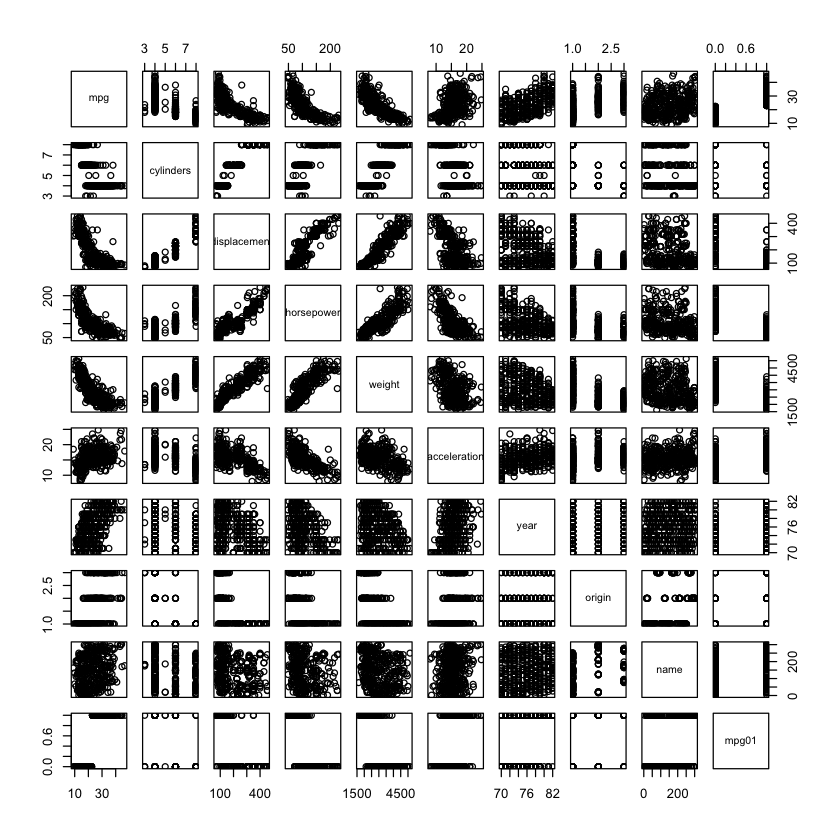

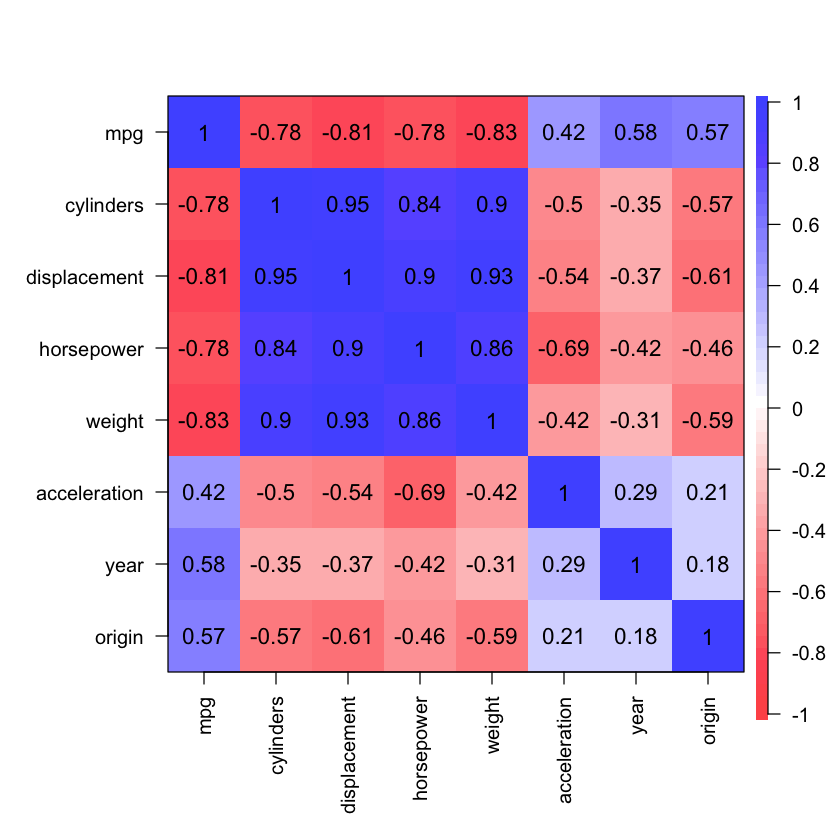

In [90]:
pairs(Auto)
corAuto<-cor(Auto [,1:8])
cor.plot(corAuto, numbers=TRUE, las = 2)

The follownig variables are most strongly correlated to mpg and therefore useful to predict it: weight, displacement, cylinders and horsepower (all negative correlations).

#### (c) Split the data into a training set and a test set.

In [91]:
set.seed(50) # Set seed so that same sample can be reproduced in the future 
#select 50% of data as sample from total n rows of the data  
sample <- sample.int(n = nrow(Auto), size = floor(.50*nrow(Auto)))
train <- Auto[sample, ]
test  <- Auto[-sample, ]

train
test

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
373,27.0,4,151,90,2735,18.0,82,1,pontiac phoenix,1
11,15.0,8,383,170,3563,10.0,70,1,dodge challenger se,0
310,41.5,4,98,76,2144,14.7,80,2,vw rabbit,1
96,12.0,8,455,225,4951,11.0,73,1,buick electra 225 custom,0
356,33.7,4,107,75,2210,14.4,81,3,honda prelude,1
375,36.0,4,105,74,1980,15.3,82,2,volkswagen rabbit l,1
304,31.8,4,85,65,2020,19.2,79,3,datsun 210,1
380,36.0,4,120,88,2160,14.5,82,3,nissan stanza xe,1
197,24.5,4,98,60,2164,22.1,76,1,chevrolet woody,1


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
3,18,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
16,22,6,198.0,95,2833,15.5,70,1,plymouth duster,0
17,18,6,199.0,97,2774,15.5,70,1,amc hornet,0
20,26,4,97.0,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan,1
21,25,4,110.0,87,2672,17.5,70,2,peugeot 504,1
22,24,4,107.0,90,2430,14.5,70,2,audi 100 ls,1
23,25,4,104.0,95,2375,17.5,70,2,saab 99e,1
25,21,6,199.0,90,2648,15.0,70,1,amc gremlin,0
27,10,8,307.0,200,4376,15.0,70,1,chevy c20,0


#### (d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [93]:
lda.auto  <- lda(mpg01 ~ cylinders + displacement + horsepower + weight, data=train)

lda.pred=predict(lda.auto, train)
lda.class=lda.pred$Direction

table(lda.pred$class, train$mpg01)

   
     0  1
  0 89  6
  1  9 92

In [96]:
x <- (89+92)/(89+92+6+9)
x
1-x

[1] 0.9234694

[1] 0.07653061

The test error rate is about 7.7%.

#### (e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [98]:
qda.auto  <- qda(mpg01 ~ cylinders + displacement + horsepower + weight, data=train)

qda.pred=predict(qda.auto, train)
qda.class=qda.pred$Direction

table(qda.pred$class, train$mpg01)

   
     0  1
  0 88  7
  1 10 91

In [99]:
y <- (88+91)/ (88+91+10+7)
y
1-y

[1] 0.9132653

[1] 0.08673469

The test error rate is about 8.7%.

#### (f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [102]:
glm.auto <- glm(mpg01 ~ cylinders + displacement + horsepower + weight, data=train)

glm.probs = predict(glm.auto, train, type = "response")
glm.pred = rep(0, length(glm.probs))
glm.pred[glm.probs > 0.5] = 1
table(glm.pred, train$mpg01)

        
glm.pred  0  1
       0 89  6
       1  9 92

In [103]:
z <- (89+92)/(89+92+6+9)
z
1-z

[1] 0.9234694

[1] 0.07653061

The test error rate is about 7.7%, the same as with the QDA.

#### (g) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [ ]:
train.X <- cbind(cylinders, weight, displacement, horsepower)[train, ]
test.X <- cbind(cylinders, weight, displacement, horsepower)[!train, ]
train.mpg01 <- mpg01[train]
set.seed(1)


In [116]:
train.auto = cbind(train$cylinders, train$weight, train$displacement, train$horsepower)
test.auto = cbind(test$cylinders, test$weight, test$displacement, test$horsepower) 
train.mpg01 = train$mpg01
set.seed(20)

knn.auto1 = knn(train.auto, test.auto, train.mpg01, k = 1) # KNN(k=1)
table(knn.auto1, test$mpg01)

knn.auto10 = knn(train.auto, test.auto, train.mpg01, k = 10) # KNN(k=10)
table(knn.auto10, test$mpg01)

knn.auto50 = knn(train.auto, test.auto, train.mpg01, k = 50) # KNN(k=50)
table(knn.auto50, test$mpg01)

knn.auto100 = knn(train.auto, test.auto, train.mpg01, k = 100) # KNN(k=100)
table(knn.auto100, test$mpg01)

         
knn.auto1  0  1
        0 79  6
        1 19 92

          
knn.auto10  0  1
         0 79  9
         1 19 89

          
knn.auto50  0  1
         0 78  7
         1 20 91

           
knn.auto100  0  1
          0 74  5
          1 24 93

In [117]:
a <- (74+5+24+93)

#auto1:
1- ((79+92)/a)

#auto10:
1-((79+89)/a)

#auto50:
1-((78+91)/a)

#auto100:
1-((74+93)/a)

[1] 0.127551

[1] 0.1428571

[1] 0.1377551

[1] 0.1479592

The error rates are slightly higher compared to the ones of logistic regression and QDA, as they are all around 12-14%. A KNN with k = 1 seems to perform best on this dataset.